- [ ] Test-hists
    - [ ] For each sample size, build a histogram of all the distributions for MCM digit 0 seeing each other digit
        - [ ] > that is the smoothed test-probability
    - [ ] Do twice for sample size 10, so we can see how different the plots are ( just next to each other)
    - [ ] Do once per sample size
    - [ ] Expect that distribution of pixel 0 will move further to the left
    - [ ] Do for 100,500,1000,2000 -> see if after there is any change
    - [ ] Fit on train set, test on test set


In [1]:
# load full mcms
# get probability distribution over test data for MCM 0 for all digits
# do this for different sample sizes

In [2]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [3]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [4]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [59]:
sample_sizes = [10, 100, 500,1000, 2000, 3000,4000,5000]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../Output/sample_sizes")


In [60]:

def dfs(x, lens=[]):
    lens.append(len(x))
    if isinstance(x[0], list) or isinstance(x[0], np.ndarray):
        dfs(x[0], lens)
    return lens

dfs(mcms_samplesizes)

[8, 11, 10, 44]

In [61]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [97]:



n_runs = 10
mcm_digit = 0

nr_digits = 10

test_probs = np.zeros((len(sample_sizes), n_runs,nr_digits, len(utils.load_test_data(digit=0))))

for test_digit in range(nr_digits):
    test_data = utils.load_test_data(digit=test_digit)

    for sample_size_idx, sample_size in enumerate(sample_sizes):

        mcms = mcms_samplesizes[sample_size_idx][:n_runs]
        counts_gstar = counts_samplesizes[sample_size_idx][:n_runs]
            
        for run_idx, mcm in enumerate(mcms):
            test_probs[sample_size_idx][run_idx][test_digit] = utils.probabilities_gstar(mcm[mcm_digit], counts_gstar[run_idx][mcm_digit], test_data, sample_size,smooth=True)


In [98]:
dfs(test_probs)

[8, 11, 10, 44, 8, 10, 10, 892, 8, 10, 10, 892, 8, 10, 10, 892, 8, 10, 10, 892]

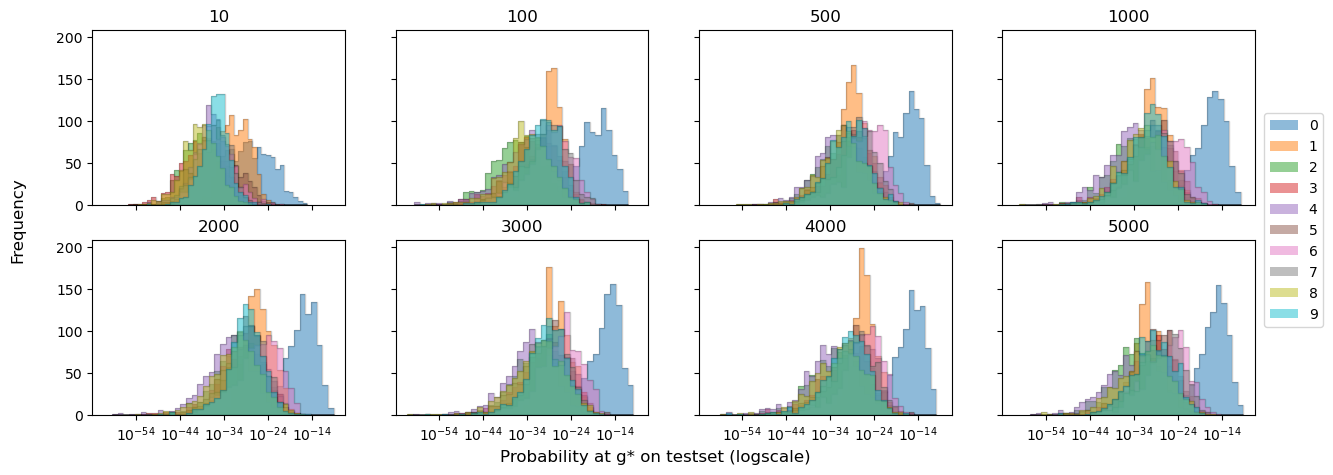

In [99]:


colors = myplot.get_list_fromcmap("tab10", N=10)
fig, axs = plt.subplots(2,len(sample_sizes)//2, figsize=(15,5),sharex=True, sharey=True)
axs = np.ravel(axs)
for ss_idx, sample_size in enumerate(sample_sizes):
    data = test_probs[ss_idx,0].T
    ax = axs[ss_idx]



    logbins = np.geomspace(data.min(),data.max(), 40)

    for i in range(10):
        ax.hist(data[:, i],bins=logbins, label=f'{i}',alpha=.5,histtype= "stepfilled",facecolor=colors[i])
        ax.hist(data[:, i],bins=logbins, facecolor="None",alpha=.2,edgecolor="black",histtype= "stepfilled")



    # if ss_idx == len(sample_sizes)-3:
    #     handles, labels = ax.get_legend_handles_labels()
    #     ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

    ax.set_title(sample_size)
    ax.set_xscale("log")

handles, labels = ax.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='center right', ncol=1,bbox_to_anchor=(.95,0.5))


fig.supxlabel("Probability at g* on testset (logscale)")

supylabel = fig.supylabel('Frequency')
supylabel.set_x(supylabel.get_position()[0] + 0.05)



plt.show()




0 vs other over runs plot. What is variance between runs?


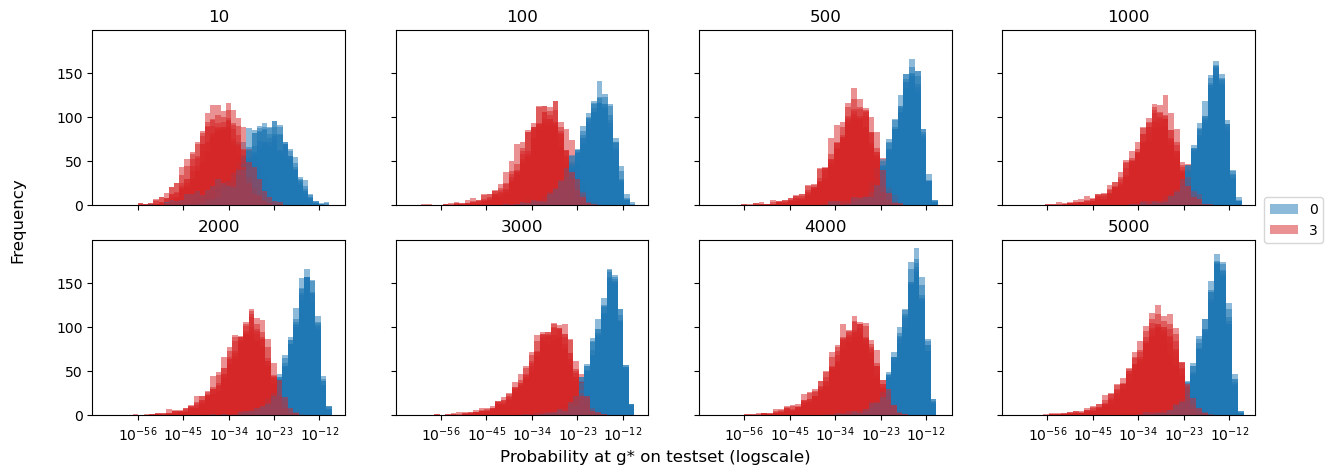

In [101]:
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(2,len(sample_sizes)//2, figsize=(15,5),sharex=True, sharey=True)
axs = np.ravel(axs)
for ss_idx, sample_size in enumerate(sample_sizes):
    data_big = test_probs[ss_idx,:].T
    ax = axs[ss_idx]


    colors = myplot.get_default_colorcycle()
    # colors = ["r", "g","y", "b"]
    logbins = np.geomspace(data_big.min(),data_big.max(), 40)
    for run_idx in range(10):
        for digit in [0,3]:
            ax.hist(data_big[:, digit,run_idx],bins=logbins, label=f'{digit}' if run_idx == 0 else None,alpha=.5,histtype= "stepfilled",color=colors[digit])
            # ax.hist(data_big[:, digit,run_idx],bins=logbins, facecolor="None",alpha=.2,edgecolor="black",histtype= "stepfilled")



    ax.set_title(sample_size)
    ax.set_xscale("log")
    # ax.set_xlabel("Probability at g* on testset (logscale)")


handles, labels = ax.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='center right', ncol=1,bbox_to_anchor=(.95,0.5))


fig.supxlabel("Probability at g* on testset (logscale)")

supylabel = fig.supylabel('Frequency')
supylabel.set_x(supylabel.get_position()[0] + 0.05)


plt.show()



In [12]:
a = data
kws = dict(histtype= "stepfilled",alpha= 0.5, linewidth = 2)
hist, edges,_ = plt.hist(a[:,0], bins = logbins,", label = "A", edgecolor="k", **kws)
plt.hist(a[:,1], bins = edges,color="gold", label = "B",  edgecolor="crimson", **kws)
plt.xscale("log")

data = test_probs[3,0].T

fig, ax = plt.subplots()
for i in range(10):
    ax.plot(data[:, i], label=f'Column {i+1}')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)

ax.set_yscale("log")
plt.show()




SyntaxError: unterminated string literal (detected at line 3) (1953332996.py, line 3)

(0.0, 7.835715071025877e-13)

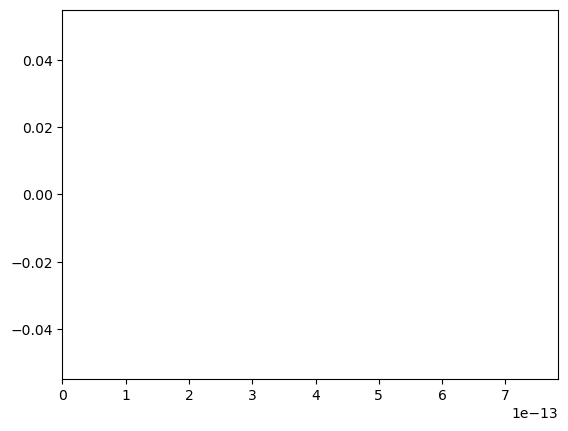

In [ ]:
data = test_probs[3,0].T

fig, ax = plt.subplots()
colors = myplot.get_list_fromcmap("viridis", N = 10)
for i in range(10):  
    myplot.bar_hist(ax, data[:,i],color=colors[i], n_bins = 100, alpha=.5)
    # ax.set_xscale("log")

plt.xlim((0))
